In [78]:
import torch
import torch.nn as nn
from torchvision.datasets import MNIST

In [79]:
from tqdm import tqdm

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt

In [81]:
from random import randint

In [82]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [83]:
device = torch.device("cpu")

In [84]:
mnist_train = MNIST(root="datasets/", train=True, download=True)
mnist_test = MNIST(root="datasets/", train=False, download=True)

In [85]:
train_X = mnist_train.data.type(torch.float).to(device)
train_y = mnist_train.targets.to(device)

test_X = mnist_test.data.type(torch.float).to(device)
test_y = mnist_test.targets.to(device)

In [86]:
n_training_samples = len(train_y)
n_training_samples

60000

In [87]:
class DaModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=28*28, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=32),
            nn.ReLU(),
            nn.Linear(in_features=32, out_features=10),
            nn.LogSoftmax(dim=1)
        )
    def forward(self, x):
        return self.layer_stack(x)

In [88]:
model = DaModel()
model.to(device)

DaModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=64, bias=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Linear(in_features=32, out_features=10, bias=True)
    (6): LogSoftmax(dim=1)
  )
)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:15<00:00,  1.28it/s]


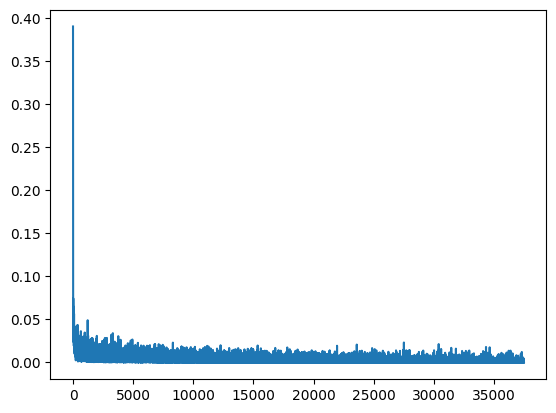

In [89]:
model.train()

n_epochs = 20

BS = 32

batch_iters = int(n_training_samples / BS)

loss_fn = nn.NLLLoss()
optim = torch.optim.SGD(params=model.parameters(), lr=0.001)

losses = []

for epoch in tqdm(range(n_epochs)):

    for _ in range(batch_iters):
        optim.zero_grad()
        
        i = randint(0, n_training_samples-BS)
        preds = model(train_X[i:i+BS])
        labels = train_y[i:i+BS]
        loss = loss_fn(preds, labels)
        losses.append(loss.item()/BS)

        loss.backward()

        optim.step()

plt.plot(losses)

In [90]:
model.eval()

((model(test_X).argmax(dim=1)==test_y).sum()/len(test_y)).item()

0.9688000082969666